# Assignment 1 : n-gram based Language Models (2-gram)

## 1. Data Loading & Preprocessing
- Load the movie_reviews dataset.
- Lowercase, strip punctuation, and tokenize by whitespace.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('movie_reviews')

In [ ]:
import string
from nltk.corpus import movie_reviews
from collections import Counter, defaultdict

documents = []
for fid in movie_reviews.fileids():
    for sent in movie_reviews.sents(fid):
        toks = []
        for w in sent:
            w = w.lower().strip()
            w = w.translate(str.maketrans('', '', string.punctuation))
            if w != '':
                toks.append(w)
        if toks:
            documents.append(toks)

In [ ]:
SENTS = [s for s in documents if len(s) >= 15][:5000]
print("Selected sentences:", len(SENTS))

In [ ]:
total_words = sum(len(s) for s in SENTS)
print("Total number of words:", total_words)

In [ ]:
unique_words = set(w for s in SENTS for w in s)
print("Total number of unique words:", len(unique_words))

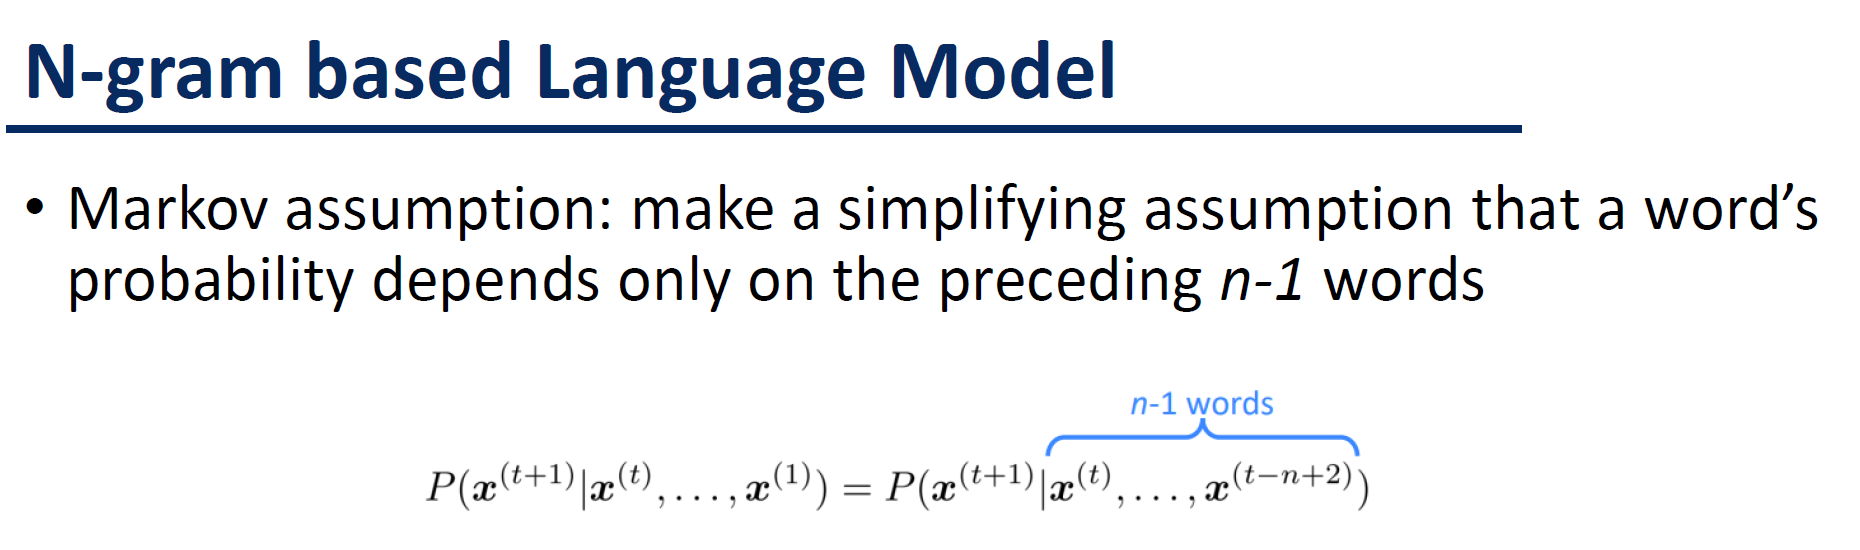

## 2. Build 2-gram based Language Model

- **2-gram (Bigram) Language Model**: Since \( n - 1 = 1 \), it considers one previous word
  $$
  P(x₁, x₂, …, x_T) = P(x₁) \times \prod_{i=2}^{T} P(xᵢ \mid xᵢ₋₁)
  $$

In [ ]:
def unigram(tokens):
    grams = []
    for w in tokens:
        grams.append([w])
    return grams


def bigram(tokens):
    ##########################################
    # Complete This Code~!
    ##########################################
    return

## 3. Build (1-gram & 2-gram) Count Statistics

We will now count how often each **word (unigram)** and **word pair (bigram)** appears in the corpus.  
This step builds the basic frequency tables used to compute unigram and bigram language model probabilities.

- **UNI**: counts of individual words (1-grams)  
- **BI**: counts of consecutive word pairs (2-grams)  
- **BI_CTX**: total counts of the first word in each bigram
- **TOTAL_UNI**: total number of all words in the corpus (for normalization)

In [ ]:
def build_ngram_counts(docs):
    UNI, BI = Counter(), Counter()
    for s in docs:
        for g in unigram(s):
            UNI[tuple(g)] += 1
        for g in bigram(s):
            BI[tuple(g)] += 1

    BI_CTX = defaultdict(int)
    for (h, w), c in BI.items():
        BI_CTX[(h,)] += c

    TOTAL_UNI = sum(UNI.values())
    return UNI, BI, BI_CTX, TOTAL_UNI


UNI, BI, BI_CTX, TOTAL_UNI = build_ngram_counts(SENTS)
print("TOTAL_UNI:", TOTAL_UNI)

# 4. Calculate n-gram Probability

$$
P(x^{(t+1)} \mid x^{(t)}, \ldots, x^{(t-n+2)})
=
\frac{P(x^{(t+1)}, x^{(t)}, \ldots, x^{(t-n+2)})}
     {P(x^{(t)}, \ldots, x^{(t-n+2)})}
\approx
\frac{\text{count}(x^{(t+1)}, x^{(t)}, \ldots, x^{(t-n+2)})}
     {\text{count}(x^{(t)}, \ldots, x^{(t-n+2)})}
$$

In [ ]:
def prob_unigram(word):
    return UNI.get((word,), 0) / TOTAL_UNI

def prob_bigram(prev, word):
    ##########################################
    # Complete This Code~!
    ##########################################
    return


## 5. Implement Sentence Log-Probability & Next-Word Prediction

For a given sentence:
- Compute **log P(sentence)** using the bigram language model  
  (first word → unigram, others → bigram with add-k smoothing).
- Using the **final token** as context, show **Top-K next-word** predictions  
  based on bigram probabilities.

In [ ]:
import math

def log_prob_sentence(sentence, k=1e-6):
    """
    Compute the log probability of a sentence using a Bigram Language Model.
    Uses add-k smoothing to avoid zero probabilities.
    """
    ##########################################
    # Complete This Code~!
    ##########################################
    return log_prob

In [ ]:
def predict_next_word(context, top_k=5, k=1e-6):
    """
    Given a sentence or a single word as context,
    predict top-K probable next words using the Bigram Language Model.
    """
    ##########################################
    # Complete This Code~!
    ##########################################
    return top_words

## 6. Compare Two Sentences using Bigram Language Model

Given two example sentences (S1, S2):
- Compute and compare their **log probabilities**.
- Identify which sentence has a higher probability under the bigram based language model.
- For each sentence, use the **final token** to show **Top-K next-word** predictions  
  and analyze how the predicted continuations differ.

In [ ]:
S1 = "The movie was absolutely"
S2 = "The plot was very"

# 1. Compare sentence log probabilities
log_p1 = log_prob_sentence(S1)
log_p2 = log_prob_sentence(S2)

print("Log Probability Comparison\n")
print(f"S1: '{S1}' → log P = {log_p1:.6f}")
print(f"S2: '{S2}' → log P = {log_p2:.6f}")
print(f"\nSentence with higher probability: {'S1' if log_p1 > log_p2 else 'S2'}")
print("\n" + "="*60 + "\n")

# 2. Predict next words
top5_S1 = predict_next_word(S1, top_k=5)
top5_S2 = predict_next_word(S2, top_k=5)

print("Top-5 Next-Word Predictions\n")

print(f"[S1] '{S1}' → context = '{S1.split()[-1]}'")
for i, (w, p) in enumerate(top5_S1, 1):
    print(f"{i}. {w:15s} (P={p:.6f})")

print()

print(f"[S2] '{S2}' → context = '{S2.split()[-1]}'")
for i, (w, p) in enumerate(top5_S2, 1):
    print(f"{i}. {w:15s} (P={p:.6f})")